# Ejercicios - Workflow

In [2]:
import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy as np

1) Create a straight line dataset using the linear regression formula (weight * X + bias).
- Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
- Split the data into 80% training, 20% testing.
- Plot the training and testing data so it becomes visual.

In [10]:
weight = 0.3
bias = 0.9

X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y = X*weight + bias

print(X[:5], y[:5])

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]]) tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120]])


In [15]:
X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

In [16]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None, model_name = ""):
    """
    Plots training data, test data, and compares predictions

    Output:
        - Train data (color Blue)
        - Test data (color Green)
        - Predictions (color red)
    """
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.title(f"{model_name} Predictions") 

    plt.legend()

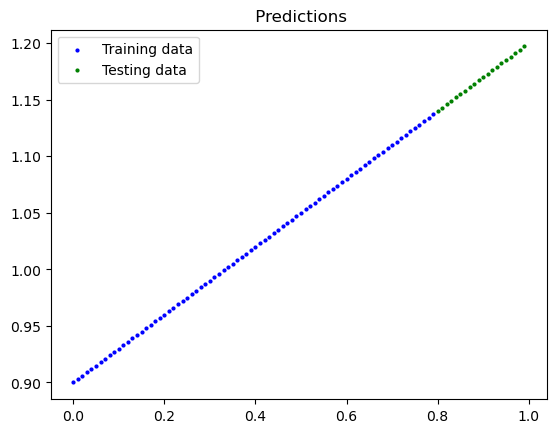

In [17]:
plot_predictions()

2) Build a PyTorch model by subclassing nn.Module.
- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().
- Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [32]:
class LinearRegressionModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weight * x + self.bias

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor)-> torch.Tensor:
        return self.linear_layer(x)

In [33]:
torch.manual_seed(42)

model_2 = LinearRegressionModelV1()
model_2.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [34]:
torch.manual_seed(42)

model_3 = LinearRegressionModelV2()
model_3.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

3) Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.

In [35]:
#train loop for model_2:

loss_fn = nn.L1Loss()
optimizer_2 = torch.optim.SGD(model_2.parameters(), lr=0.01)

epochs = 20

torch.manual_seed(42)

for epoch in range(epochs):
    model_2.train()

    y_pred = model_2.forward(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer_2.zero_grad()

    loss.backward()

    optimizer_2.step()

    model_2.eval()

    with torch.inference_mode():
        test_preds = model_2(X_test)
        test_loss = loss_fn(test_preds, y_test)

    if epoch % 10: 
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 1 | Loss: 0.745137631893158 | Test loss: 0.7112821340560913
Epoch: 2 | Loss: 0.7335773706436157 | Test loss: 0.6977468729019165
Epoch: 3 | Loss: 0.7220171093940735 | Test loss: 0.6842116713523865
Epoch: 4 | Loss: 0.7104568481445312 | Test loss: 0.6706763505935669
Epoch: 5 | Loss: 0.698896586894989 | Test loss: 0.6571411490440369
Epoch: 6 | Loss: 0.6873363256454468 | Test loss: 0.6436058878898621
Epoch: 7 | Loss: 0.6757761240005493 | Test loss: 0.630070686340332
Epoch: 8 | Loss: 0.6642158627510071 | Test loss: 0.6165354251861572
Epoch: 9 | Loss: 0.6526556015014648 | Test loss: 0.6030001640319824
Epoch: 11 | Loss: 0.6295350790023804 | Test loss: 0.5759296417236328
Epoch: 12 | Loss: 0.6179748773574829 | Test loss: 0.562394380569458
Epoch: 13 | Loss: 0.6064146161079407 | Test loss: 0.548859179019928
Epoch: 14 | Loss: 0.5948542952537537 | Test loss: 0.5353239178657532
Epoch: 15 | Loss: 0.5832940936088562 | Test loss: 0.5217887163162231
Epoch: 16 | Loss: 0.571733832359314 | Test loss:

In [36]:
#train loop for model_3:

optimizer_3 = torch.optim.SGD(model_3.parameters(), lr=0.01)

epochs = 20

for epoch in range(epochs):
    model_3.train()

    y_preds = model_3.forward(X_train)

    loss = loss_fn(y_preds, y_train)

    optimizer_3.zero_grad()

    loss.backward()

    optimizer_3.step()

    with torch.inference_mode():
        test_preds = model_3.forward(X_test)
        test_loss = loss_fn(test_preds, y_test)
    
    if epoch % 10: 
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 1 | Loss: 0.12268531322479248 | Test loss: 0.3275222182273865
Epoch: 2 | Loss: 0.11817598342895508 | Test loss: 0.3188292384147644
Epoch: 3 | Loss: 0.11404351890087128 | Test loss: 0.31071916222572327
Epoch: 4 | Loss: 0.11039082705974579 | Test loss: 0.3029037415981293
Epoch: 5 | Loss: 0.10704056173563004 | Test loss: 0.2953853905200958
Epoch: 6 | Loss: 0.10397658497095108 | Test loss: 0.28816625475883484
Epoch: 7 | Loss: 0.10118546336889267 | Test loss: 0.2815522253513336
Epoch: 8 | Loss: 0.09876175224781036 | Test loss: 0.27524417638778687
Epoch: 9 | Loss: 0.09655755013227463 | Test loss: 0.2692442536354065
Epoch: 11 | Loss: 0.09265774488449097 | Test loss: 0.257554829120636
Epoch: 12 | Loss: 0.09094460308551788 | Test loss: 0.2521781027317047
Epoch: 13 | Loss: 0.08940067142248154 | Test loss: 0.2471161186695099
Epoch: 14 | Loss: 0.08800855278968811 | Test loss: 0.24237127602100372
Epoch: 15 | Loss: 0.08675072342157364 | Test loss: 0.23794588446617126
Epoch: 16 | Loss: 0.08561

4) Make predictions with the trained model on the test data.
- Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

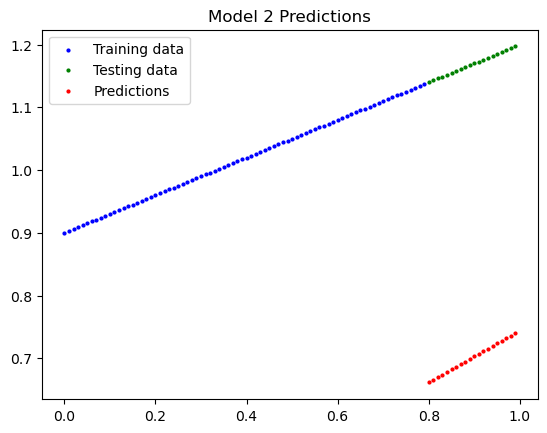

In [37]:
model_2.eval()

with torch.inference_mode():
    y_preds_2 = model_2.forward(X_test)

plot_predictions(predictions=y_preds_2, model_name="Model 2")

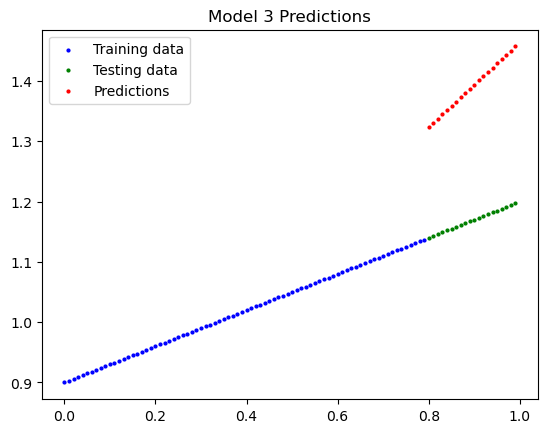

In [39]:
model_3.eval()

with torch.inference_mode():
    y_preds_3 = model_3.forward(X_test)

plot_predictions(predictions=y_preds_3, model_name="Model 3")


5) Save your trained model's state_dict() to file.
- Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
- Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [43]:
from pathlib import Path

# 1) Crear el directorio
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2) Crear al path de guardado
MODEL_NAME = "01_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH_1 = MODEL_PATH / MODEL_NAME


# 3) Guardar el model state dict
print(F"Saving model to: {MODEL_SAVE_PATH_1}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH_1)

Saving model to: models\01_pytorch_workflow_model_2.pth


In [44]:
MODEL_NAME = "01_pytorch_workflow_model_3.pth"
MODEL_SAVE_PATH_2 = MODEL_PATH / MODEL_NAME

print(F"Saving model to: {MODEL_SAVE_PATH_2}")
torch.save(obj=model_3.state_dict(), f=MODEL_SAVE_PATH_2)

Saving model to: models\01_pytorch_workflow_model_3.pth


In [45]:
loaded_model_2 = LinearRegressionModelV1()
loaded_model_3 = LinearRegressionModelV2()

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH_1))
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH_2))

<All keys matched successfully>

In [46]:
#comparamos modelos
loaded_model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test)
    loaded_model_2_preds = loaded_model_2(X_test)

y_preds == loaded_model_2_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [47]:
#comparamos modelos
loaded_model_3.eval()

with torch.inference_mode():
    y_preds = model_3(X_test)
    loaded_model_3_preds = loaded_model_3(X_test)

y_preds == loaded_model_3_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])